# The Battle of Neigborhoods

#### Import all the libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

 

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
 

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import json # library to handle JSON files

 

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [2]:
!conda install -c conda-forge folium

Solving environment: done

# All requested packages already installed.



In [3]:
import folium # map rendering library

In [4]:
from lxml import html

In [5]:
!conda install -c conda-forge geopy

Solving environment: done

# All requested packages already installed.



In [6]:
from geopy.geocoders import Nominatim 
print('Libraries imported.')

Libraries imported.


#### Check the Helsinki neighborhoods

In [7]:
#Fetch wikipedia page as html
from lxml import html
url = 'https://fi.wikipedia.org/wiki/Helsingin_alueellinen_jako'
pageContent=requests.get(url)
neighborhood_html = html.fromstring(pageContent.content)

In [8]:
# define the dataframe columns
column_names = ['Neighborhood','lat','lng'] 
df = pd.DataFrame(columns=column_names)
#Get table rows of Helsinki Neigborhoods with xpath
rows = neighborhood_html.xpath('//*[@id="mw-content-text"]/div/table[2]/tbody/tr')

for row in rows:
    #Append dataframe with variable values
    children = row[0].getchildren()
    
    for child in children:
        if child.tag == 'ul':
            for li in child[0]:
                #print('Suppea')
                df = df.append({'Neighborhood': li.text}, ignore_index=True)
        else:
            df = df.append({'Neighborhood': child.text}, ignore_index=True)
           
df.head()

,Neighborhood,lat,lng
0,Kruununhaka,NaN,NaN
1,Kluuvi,NaN,NaN
2,Kaartinkaupunki,NaN,NaN
3,Kamppi,NaN,NaN
4,Punavuori,NaN,NaN


#### Use geopy library to get the latitude and longitude values of Helsinki

In [9]:
# Let's get first coordinates of Helsinki area and see that data is correct
address = 'Helsinki, FI'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Helsinki City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Helsinki City are 60.1674098, 24.9425769.


#### Use geopy library to get the latitude and longitude values of Helsinki neighborhoods

In [10]:
import time
#Create lists for lat and long
lat = []
lng = []

#Loop through all neigborhoods in Helsinki
for adr in df['Neighborhood']:
    # Wait for 2 seconds for denial of service attack
    time.sleep(2)
    
    #Use geolocator to get coordinates of neigborhoods
    loc = geolocator.geocode(adr)
    #Append coordinates to lists
    lat.append(loc.latitude)
    lng.append(loc.longitude)

#Map coordinate lists to data frame 
df['lat'] = lat
df['lng'] = lng
df.head()

,Neighborhood,lat,lng
0,Kruununhaka,60.172870,24.954733
1,Kluuvi,60.170778,24.947329
2,Kaartinkaupunki,60.165214,24.947222
3,Kamppi,60.168535,24.930494
4,Punavuori,60.161237,24.936505


#### Enable a sample from the study of Helsinki population growth.

In [11]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_951f5414bb584192b1e76ca815d9ca60 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='i3KlhUrLqsAzzItjoD3d8h6SFB5uCTthKnHFlh8c_I1o',
    ibm_auth_endpoint="https://iam.eu-de.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_951f5414bb584192b1e76ca815d9ca60.get_object(Bucket='annelinbattleofneigborhood-donotdelete-pr-etixib3qn5erzv',Key='Hginvaestokehitys.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_0 = pd.read_excel(body)
df_data_0.head()


,Neighborhood,2019,2030
0,Alppiharju,12223,11736
1,Aluemeri,0,0
2,Eira,1141,1116
3,Etelä-Haaga,12536,13575
4,Etu-Töölö,15113,14394


In [12]:
hki=df_data_0
hki.shape

(87, 3)

In [13]:
#Merge population growth data to Dataframe
tot = pd.merge(df, hki, on='Neighborhood')
tot.head()

,Neighborhood,lat,lng,2019,2030
0,Kluuvi,60.170778,24.947329,644,664
1,Kaartinkaupunki,60.165214,24.947222,1022,1142
2,Kamppi,60.168535,24.930494,12398,12679
3,Punavuori,60.161237,24.936505,9279,9552
4,Eira,60.156191,24.938375,1141,1116


#### Add a column to show the population increase/decrease from 2019 to 2030. If the percent is < 1, the population has decreased

In [14]:
tot['percent'] = tot['2030']/tot['2019']
tot.head()

,Neighborhood,lat,lng,2019,2030,percent
0,Kluuvi,60.170778,24.947329,644,664,1.031056
1,Kaartinkaupunki,60.165214,24.947222,1022,1142,1.117417
2,Kamppi,60.168535,24.930494,12398,12679,1.022665
3,Punavuori,60.161237,24.936505,9279,9552,1.029421
4,Eira,60.156191,24.938375,1141,1116,0.978089


#### Add a column to show the number of population growth

In [15]:
tot['Growth'] = tot['2030']-tot['2019']
tot

,Neighborhood,lat,lng,2019,2030,percent,Growth
0,Kluuvi,60.170778,24.947329,644,664,1.031056,20
1,Kaartinkaupunki,60.165214,24.947222,1022,1142,1.117417,120
2,Kamppi,60.168535,24.930494,12398,12679,1.022665,281
3,Punavuori,60.161237,24.936505,9279,9552,1.029421,273
4,Eira,60.156191,24.938375,1141,1116,0.978089,-25
5,Ullanlinna,60.158715,24.949404,10866,10632,0.978465,-234
6,Katajanokka,60.166975,24.968151,4581,4723,1.030998,142
7,Kaivopuisto,60.156843,24.956721,495,474,0.957576,-21
8,Sörnäinen,60.183885,24.964409,10179,22998,2.259358,12819
9,Vilhonvuori,60.182761,24.959499,7292,7098,0.973396,-194


#### It seems that Pasila has wrong lat and lng. Let's correct them

In [16]:
# Let's get Pasilas coordinates
address = 'Pasila, FI'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Pasila are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Pasila are 60.197873, 24.9322653.


In [17]:
corr=tot
corr.iat[19,1]='60.197873'
corr.iat[19,2]='24.9322653'
corr

,Neighborhood,lat,lng,2019,2030,percent,Growth
0,Kluuvi,60.170778,24.947329,644,664,1.031056,20
1,Kaartinkaupunki,60.165214,24.947222,1022,1142,1.117417,120
2,Kamppi,60.168535,24.930494,12398,12679,1.022665,281
3,Punavuori,60.161237,24.936505,9279,9552,1.029421,273
4,Eira,60.156191,24.938375,1141,1116,0.978089,-25
5,Ullanlinna,60.158715,24.949404,10866,10632,0.978465,-234
6,Katajanokka,60.166975,24.968151,4581,4723,1.030998,142
7,Kaivopuisto,60.156843,24.956721,495,474,0.957576,-21
8,Sörnäinen,60.183885,24.964409,10179,22998,2.259358,12819
9,Vilhonvuori,60.182761,24.959499,7292,7098,0.973396,-194


In [18]:
tot=corr

#### Sort the neighborhoods and growth percentage, only the largest increases are taken into account

In [19]:
tot.sort_values(by=['2030','percent','Growth'], inplace=True, ascending=False)
final=tot.head(20)
final

,Neighborhood,lat,lng,2019,2030,percent,Growth
77,Vuosaari,60.208348,25.143554,38823,43286,1.114958,4463
10,Kallio,60.183982,24.952451,29934,42852,1.431549,12918
67,Mellunkylä,60.235965,25.089218,39167,41397,1.056936,2230
42,Kaarela,60.251866,24.873085,28874,36259,1.255766,7385
51,Malmi,55.605293,13.000157,29374,34712,1.181725,5338
60,Herttoniemi,60.195525,25.029063,28884,32800,1.135577,3916
70,Laajasalo,60.173205,25.044920,20015,31332,1.565426,11317
32,Vanhakaupunki,31.778287,35.231953,25420,29243,1.150393,3823
35,Haaga,60.218426,24.897974,27682,28213,1.019182,531
39,Lauttasaari,60.159369,24.875304,24394,26462,1.084775,2068


In [20]:
new=final

In [21]:
final.reset_index(inplace = True)
final

,index,Neighborhood,lat,lng,2019,2030,percent,Growth
0,77,Vuosaari,60.208348,25.143554,38823,43286,1.114958,4463
1,10,Kallio,60.183982,24.952451,29934,42852,1.431549,12918
2,67,Mellunkylä,60.235965,25.089218,39167,41397,1.056936,2230
3,42,Kaarela,60.251866,24.873085,28874,36259,1.255766,7385
4,51,Malmi,55.605293,13.000157,29374,34712,1.181725,5338
5,60,Herttoniemi,60.195525,25.029063,28884,32800,1.135577,3916
6,70,Laajasalo,60.173205,25.044920,20015,31332,1.565426,11317
7,32,Vanhakaupunki,31.778287,35.231953,25420,29243,1.150393,3823
8,35,Haaga,60.218426,24.897974,27682,28213,1.019182,531
9,39,Lauttasaari,60.159369,24.875304,24394,26462,1.084775,2068


In [22]:
new.drop('index', axis=1,inplace=True) 
new.head()

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,Neighborhood,lat,lng,2019,2030,percent,Growth
0,Vuosaari,60.208348,25.143554,38823,43286,1.114958,4463
1,Kallio,60.183982,24.952451,29934,42852,1.431549,12918
2,Mellunkylä,60.235965,25.089218,39167,41397,1.056936,2230
3,Kaarela,60.251866,24.873085,28874,36259,1.255766,7385
4,Malmi,55.605293,13.000157,29374,34712,1.181725,5338


In [23]:
corr=final
corr.set_index('Neighborhood')

,lat,lng,2019,2030,percent,Growth
Neighborhood,,,,,,
Vuosaari,60.208348,25.143554,38823,43286,1.114958,4463
Kallio,60.183982,24.952451,29934,42852,1.431549,12918
Mellunkylä,60.235965,25.089218,39167,41397,1.056936,2230
Kaarela,60.251866,24.873085,28874,36259,1.255766,7385
Malmi,55.605293,13.000157,29374,34712,1.181725,5338
Herttoniemi,60.195525,25.029063,28884,32800,1.135577,3916
Laajasalo,60.173205,25.044920,20015,31332,1.565426,11317
Vanhakaupunki,31.778287,35.231953,25420,29243,1.150393,3823
Haaga,60.218426,24.897974,27682,28213,1.019182,531


#### Notice the big difference of population between the neighborhoods in 2030

/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


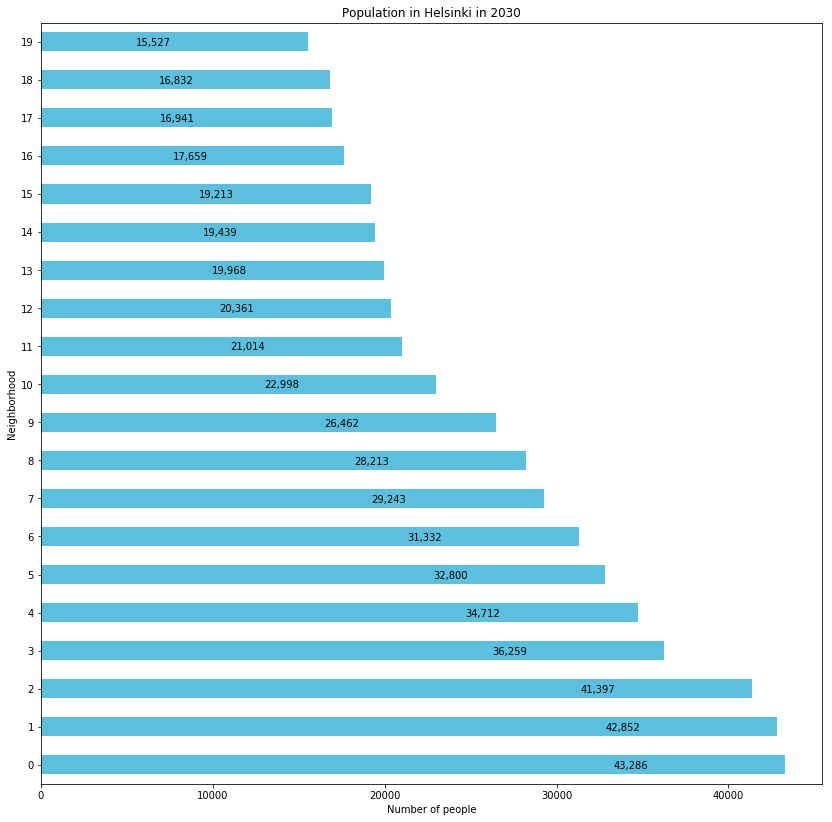

In [24]:
corr.sort_values(by='2030', ascending=False, axis=0, inplace=True)
corr['2030'].plot(kind='barh', figsize=(14, 14), color='#5bc0de')
plt.title('Population in Helsinki in 2030')
plt.ylabel('Neighborhood')
plt.xlabel('Number of people')
for index, value in enumerate(corr['2030']): 
    label = format(int(value), ',')
    plt.annotate(label, xy=(value - 10000, index - 0.10), color='black')
plt.show()



#### Helsinki map with top20 population in 2030 neighborhoods

In [25]:
# create map of Helsinki using latitude and longitude values
map_hki = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(new['lat'], new['lng'], new['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hki)  
    
map_hki

#### Foursquare API

#### In this section we generate url for fetching venue data for Helsinki neigborhoods. The id and secret will not be shown

In [26]:
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [27]:
#Check that coordites work correctly
neighborhood_latitude = new.loc[0, 'lat'] # neighborhood latitude value
neighborhood_longitude = new.loc[0, 'lng'] # neighborhood longitude value

neighborhood_name = new.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))


Latitude and longitude values of Vuosaari are 60.2083483, 25.1435537.


#### Functions for data preparation and analysis 

In [28]:
#Function to Get nearby venues
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)


In [29]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [30]:
# Function for most common venue
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

#### Helsinki venues

In [31]:
all_helsinki_venues = getNearbyVenues(names=new['Neighborhood'],latitudes=new['lat'], longitudes=new['lng'])

Vuosaari
Kallio
Mellunkylä
Kaarela
Malmi
Herttoniemi
Laajasalo
Vanhakaupunki
Haaga
Lauttasaari
Sörnäinen
Vartiokylä
Puistola
Pitäjänmäki
Länsisatama
Munkkiniemi
Oulunkylä
Vallila
Taka-Töölö
Pasila


In [32]:
all_helsinki_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Vuosaari,60.208348,25.143554,UH & FIX Vuosaari,60.208813,25.141487,Recreation Center
1,Vuosaari,60.208348,25.143554,Marian Konditoria,60.207007,25.145349,Bakery
2,Vuosaari,60.208348,25.143554,Vuosaaren urheilutalo,60.208787,25.141546,Gym / Fitness Center
3,Vuosaari,60.208348,25.143554,Liikuntakeskus Fressi Clubhouse,60.207059,25.135240,Gym
4,Vuosaari,60.208348,25.143554,Alko,60.206937,25.145789,Liquor Store


In [33]:
all_helsinki_venues.groupby('Neighborhood').nunique()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,,
Haaga,1,1,1,11,11,11,8
Herttoniemi,1,1,1,30,30,30,22
Kaarela,1,1,1,4,4,4,3
Kallio,1,1,1,29,30,30,21
Laajasalo,1,1,1,4,4,4,3
Lauttasaari,1,1,1,26,26,26,18
Länsisatama,1,1,1,25,25,25,20
Malmi,1,1,1,30,30,30,21
Mellunkylä,1,1,1,18,18,18,16


#### Let's find out how many unique categories can be curated from all the returned venues

In [34]:
print('There are {} uniques categories.'.format(len(all_helsinki_venues['Venue Category'].unique())))

There are 138 uniques categories.


In [35]:
# Print all unique venue groups
all_helsinki_venues['Venue Category'].unique()

array(['Recreation Center', 'Bakery', 'Gym / Fitness Center', 'Gym',
       'Liquor Store', 'Pizza Place', 'Grocery Store', 'Sandwich Place',
       'Café', 'Jewelry Store', 'Bookstore', 'Convenience Store',
       'Casino', 'Pool', 'Plaza', 'Optical Shop',
       'Thrift / Vintage Store', 'Flower Shop', 'Taxi Stand', 'Cafeteria',
       'Health Food Store', 'Bus Stop', 'Clothing Store', 'Playground',
       'Bike Shop', 'Scandinavian Restaurant', 'Hotel', 'Park',
       'Supermarket', 'Thai Restaurant', 'Wine Bar', 'Breakfast Spot',
       'Sushi Restaurant', 'Middle Eastern Restaurant', 'Beer Bar',
       'Yoga Studio', 'Japanese Restaurant', 'Theater',
       'Food & Drink Shop', 'South American Restaurant', 'Dive Bar',
       'Sauna / Steam Room', 'Himalayan Restaurant', 'Skate Park',
       'Falafel Restaurant', 'Chinese Restaurant', 'Fast Food Restaurant',
       'Bar', 'Soccer Field', 'Discount Store', 'Flea Market', 'Garden',
       'Salad Place', 'Hotel Bar', 'Coffee Shop', 'I

In [36]:
all_helsinki_venues.shape

(422, 7)

#### Let's check how many venues there is in each neighborhood

In [37]:
hood_venue = all_helsinki_venues[['Neighborhood', 'Venue']].copy()

In [38]:
hood_venues = hood_venue.groupby(['Neighborhood']).size().reset_index(name='Venues')
hood_venues.head()

,Neighborhood,Venues
0,Haaga,11
1,Herttoniemi,30
2,Kaarela,4
3,Kallio,30
4,Laajasalo,4


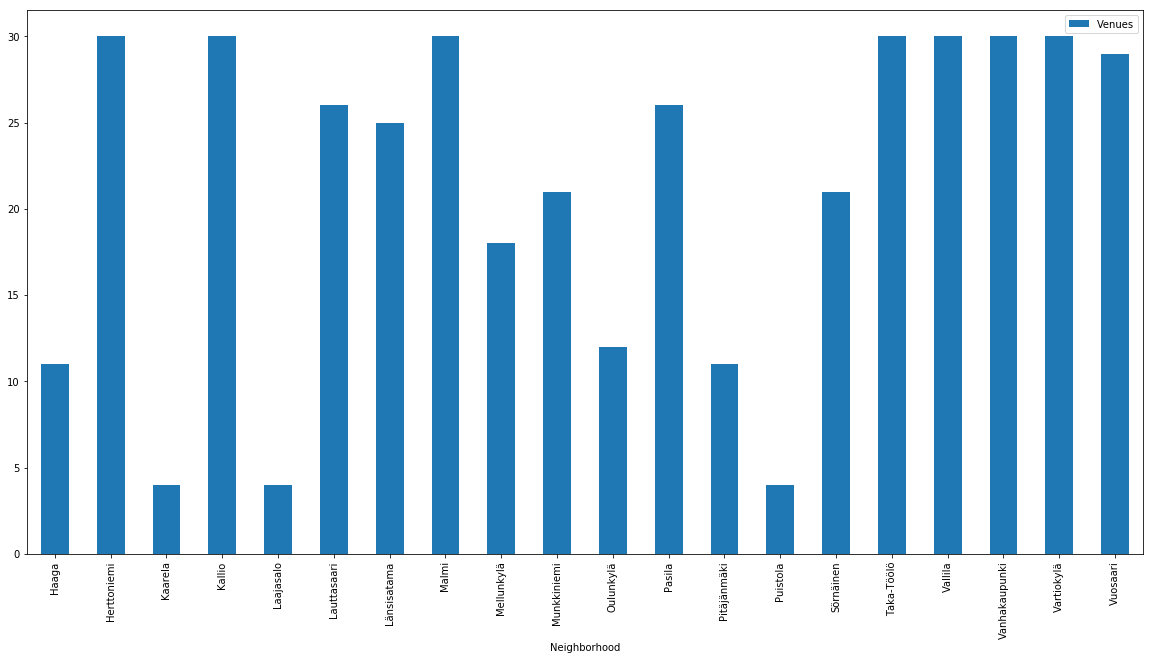

In [39]:
hood_venues.sort_values(by=['Venues'])
hood_venues.plot.bar(x='Neighborhood', y='Venues', rot=90,figsize=(20,10))

#### Analyze Each Neighborhood

In [40]:
# one hot encoding
helsinki_onehot = pd.get_dummies(all_helsinki_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
helsinki_onehot['Neighborhood'] = all_helsinki_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [helsinki_onehot.columns[-1]] + list(helsinki_onehot.columns[:-1])
downtown_onehot = helsinki_onehot[fixed_columns]

helsinki_onehot.head()

,African Restaurant,Art Gallery,Art Museum,Athletics & Sports,Bakery,Bar,Bay,Beach,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Bus Stop,Cafeteria,Café,Canal,Casino,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Costume Shop,Department Store,Dessert Shop,Disc Golf,Discount Store,Dive Bar,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Furniture / Home Store,Garden,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Knitting Store,Kurdish Restaurant,Liquor Store,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Neighborhood,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Pub,Record Shop,Recreation Center,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Repair,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,Sporting Goods Shop,Supermarket,Sushi Restaurant,Taxi Stand,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vuosaari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vuosaari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vuosaari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Vuosaari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,Vuosaari,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


#### Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category

In [41]:
helsinki_grouped = helsinki_onehot.groupby('Neighborhood').mean().reset_index()
helsinki_grouped.head()

,Neighborhood,African Restaurant,Art Gallery,Art Museum,Athletics & Sports,Bakery,Bar,Bay,Beach,Beer Bar,Beer Garden,Bike Shop,Bistro,Bookstore,Breakfast Spot,Buffet,Burger Joint,Burrito Place,Bus Stop,Cafeteria,Café,Canal,Casino,Chinese Restaurant,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Comfort Food Restaurant,Construction & Landscaping,Convenience Store,Costume Shop,Department Store,Dessert Shop,Disc Golf,Discount Store,Dive Bar,Donut Shop,Electronics Store,Ethiopian Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Flea Market,Flower Shop,Food & Drink Shop,Furniture / Home Store,Garden,Gastropub,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewelry Store,Kebab Restaurant,Knitting Store,Kurdish Restaurant,Liquor Store,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Mountain,Movie Theater,Multiplex,Museum,Music Venue,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoor Supply Store,Park,Pet Store,Pharmacy,Pizza Place,Platform,Playground,Plaza,Pool,Post Office,Pub,Record Shop,Recreation Center,Restaurant,Road,Roof Deck,Salad Place,Sandwich Place,Sauna / Steam Room,Scandinavian Restaurant,Scenic Lookout,Seafood Restaurant,Shoe Repair,Shopping Mall,Skate Park,Soccer Field,Soccer Stadium,South American Restaurant,Sporting Goods Shop,Supermarket,Sushi Restaurant,Taxi Stand,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Train Station,Tram Station,Tunnel,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Video Store,Vietnamese Restaurant,Warehouse Store,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Haaga,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.363636,0.090909,0.090909,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.090909,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.090909,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.090909,0.090909,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,Herttoniemi,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.166667,0.000000,0.033333,0.0,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.0,0.0,0.033333,0.0,0.033333,0.0,0.0,0.033333,0.000000,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.033333,0.033333,0.033333,0.0,0.100000,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.033333,0.0,0.0,0.033333,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.033333,0.000000,0.0,0.0,0.0,0.0,0.033333,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.066667,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.066667,0.033333,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
2,Kaarela,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.000000,0.0,0.250000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.250000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0

In [42]:
#Get 10 top venues of neighborhood
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = helsinki_grouped['Neighborhood']

for ind in np.arange(helsinki_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(helsinki_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Haaga,Bus Stop,Sushi Restaurant,Garden,Pizza Place,Café,Cafeteria,Supermarket,Recreation Center,History Museum,Historic Site
1,Herttoniemi,Bus Stop,Gym / Fitness Center,Sandwich Place,Supermarket,Discount Store,Café,Chinese Restaurant,Clothing Store,Department Store,Post Office
2,Kaarela,Bus Stop,Garden,Park,Zoo,Fast Food Restaurant,Furniture / Home Store,Food & Drink Shop,Flower Shop,Flea Market,Falafel Restaurant
3,Kallio,Bakery,Café,Breakfast Spot,Park,Scandinavian Restaurant,South American Restaurant,Dive Bar,Sauna / Steam Room,Food & Drink Shop,Cafeteria
4,Laajasalo,Park,Flower Shop,Bus Stop,Zoo,Fast Food Restaurant,Garden,Furniture / Home Store,Food & Drink Shop,Flea Market,Falafel Restaurant


In [43]:
#Check shape
helsinki_grouped.shape

(20, 138)

In [44]:
all_helsinki_venues.shape

(422, 7)

#### Let's print each neighborhood along with the top 5 most common venues 

In [45]:
#Five top venues of Helsinki neighborhoods
num_top_venues = 5

for hood in new['Neighborhood']:
    print("----"+hood+"----")
    temp = helsinki_grouped[helsinki_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Vuosaari----
            venue  freq
0   Jewelry Store  0.07
1            Café  0.07
2             Gym  0.03
3  Clothing Store  0.03
4     Pizza Place  0.03


----Kallio----
                     venue  freq
0                   Bakery  0.17
1                     Café  0.10
2  Scandinavian Restaurant  0.07
3           Breakfast Spot  0.07
4                     Park  0.07


----Mellunkylä----
                       venue  freq
0  Middle Eastern Restaurant  0.11
1                Supermarket  0.11
2             Discount Store  0.06
3       Himalayan Restaurant  0.06
4       Fast Food Restaurant  0.06


----Kaarela----
               venue  freq
0           Bus Stop  0.50
1             Garden  0.25
2               Park  0.25
3         Restaurant  0.00
4  Recreation Center  0.00


----Malmi----
                     venue  freq
0                 Wine Bar  0.13
1              Coffee Shop  0.10
2                    Hotel  0.10
3                     Café  0.07
4  Scandinavian Restaurant  0.07

#### Cluster Neighborhoods 

#### Run k-means to cluster the neighborhood into 5 clusters

In [46]:
# set number of clusters
kclusters = 5

helsinki_grouped_clustering = helsinki_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(helsinki_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([2, 1, 2, 1, 3, 1, 1, 1, 1, 1], dtype=int32)

#### Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood

In [47]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

helsinki_merged = all_helsinki_venues

# merge helsinki_grouped with helsinki_data to add latitude/longitude for each neighborhood
helsinki_merged = helsinki_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

helsinki_merged.head() 

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Vuosaari,60.208348,25.143554,UH & FIX Vuosaari,60.208813,25.141487,Recreation Center,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
1,Vuosaari,60.208348,25.143554,Marian Konditoria,60.207007,25.145349,Bakery,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
2,Vuosaari,60.208348,25.143554,Vuosaaren urheilutalo,60.208787,25.141546,Gym / Fitness Center,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
3,Vuosaari,60.208348,25.143554,Liikuntakeskus Fressi Clubhouse,60.207059,25.135240,Gym,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
4,Vuosaari,60.208348,25.143554,Alko,60.206937,25.145789,Liquor Store,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place


#### Let's visualize the resulting clusters

In [48]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(helsinki_merged['Neighborhood Latitude'], helsinki_merged['Neighborhood Longitude'], helsinki_merged['Neighborhood'], helsinki_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [49]:
most_common_in_cluster = helsinki_merged[['Cluster Labels', '1st Most Common Venue']].copy()
most_common_in_cluster = most_common_in_cluster.groupby(['Cluster Labels', '1st Most Common Venue' ]).size().reset_index(name='Venues')
most_common_in_cluster

,Cluster Labels,1st Most Common Venue,Venues
0,0,Pizza Place,23
1,1,Bakery,30
2,1,Bar,30
3,1,Bus Stop,56
4,1,Café,75
5,1,Coffee Shop,30
6,1,Historic Site,30
7,1,Park,30
8,1,Pizza Place,21
9,1,Supermarket,44


In [50]:
#Giving cluster names after analyzing data
cluster_name = {}
cluster_name[0] = "Lot of services"
cluster_name[1] = "Vine & Dine"
cluster_name[2] = "Traffic spot"
cluster_name[3] = "Park"
cluster_name[4] = "Shopping Mall"

In [51]:
helsinki_merged.set_index("Neighborhood", inplace=True)
helsinki_merged.head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,
Vuosaari,60.208348,25.143554,UH & FIX Vuosaari,60.208813,25.141487,Recreation Center,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
Vuosaari,60.208348,25.143554,Marian Konditoria,60.207007,25.145349,Bakery,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
Vuosaari,60.208348,25.143554,Vuosaaren urheilutalo,60.208787,25.141546,Gym / Fitness Center,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
Vuosaari,60.208348,25.143554,Liikuntakeskus Fressi Clubhouse,60.207059,25.135240,Gym,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place
Vuosaari,60.208348,25.143554,Alko,60.206937,25.145789,Liquor Store,1,Café,Jewelry Store,Scandinavian Restaurant,Bus Stop,Cafeteria,Pizza Place,Casino,Flower Shop,Clothing Store,Sandwich Place


#### Example of how an investor could study information of a neighborhood when thinking about of any kind of a business idea 

In [52]:
helsinki_merged.loc['Kallio'].head()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,
Kallio,60.183982,24.952451,Karhupuisto,60.183919,24.952487,Park,1,Bakery,Café,Breakfast Spot,Park,Scandinavian Restaurant,South American Restaurant,Dive Bar,Sauna / Steam Room,Food & Drink Shop,Cafeteria
Kallio,60.183982,24.952451,IPI Kulmakuppila,60.183200,24.953525,Café,1,Bakery,Café,Breakfast Spot,Park,Scandinavian Restaurant,South American Restaurant,Dive Bar,Sauna / Steam Room,Food & Drink Shop,Cafeteria
Kallio,60.183982,24.952451,Ravintola Kolmon3n,60.182188,24.950142,Scandinavian Restaurant,1,Bakery,Café,Breakfast Spot,Park,Scandinavian Restaurant,South American Restaurant,Dive Bar,Sauna / Steam Room,Food & Drink Shop,Cafeteria
Kallio,60.183982,24.952451,Lidl,60.182164,24.953236,Supermarket,1,Bakery,Café,Breakfast Spot,Park,Scandinavian Restaurant,South American Restaurant,Dive Bar,Sauna / Steam Room,Food & Drink Shop,Cafeteria
Kallio,60.183982,24.952451,Way Bakery And Wine Bar,60.184383,24.954023,Bakery,1,Bakery,Café,Breakfast Spot,Park,Scandinavian Restaurant,South American Restaurant,Dive Bar,Sauna / Steam Room,Food & Drink Shop,Cafeteria


#### Sort the values by cluster labels

In [53]:
helsinki_merged.sort_values(by=['Cluster Labels'], inplace=True, ascending=False)
lop=helsinki_merged.head(30)
lop

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
Neighborhood,,,,,,,,,,,,,,,,,
Puistola,60.276033,25.036777,Active Kuntoklubi Tapuli,60.275121,25.032153,Gym / Fitness Center,4,Shopping Mall,Convenience Store,Gym / Fitness Center,Pizza Place,Falafel Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Zoo
Puistola,60.276033,25.036777,Puistori,60.274757,25.045072,Shopping Mall,4,Shopping Mall,Convenience Store,Gym / Fitness Center,Pizza Place,Falafel Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Zoo
Puistola,60.276033,25.036777,Evin Pizzeria,60.274476,25.034447,Pizza Place,4,Shopping Mall,Convenience Store,Gym / Fitness Center,Pizza Place,Falafel Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Zoo
Puistola,60.276033,25.036777,R-kioski,60.275221,25.034657,Convenience Store,4,Shopping Mall,Convenience Store,Gym / Fitness Center,Pizza Place,Falafel Restaurant,Food & Drink Shop,Flower Shop,Flea Market,Fast Food Restaurant,Zoo
Laajasalo,60.173205,25.044920,HSL 4094 Isosaarentie,60.175577,25.046342,Bus Stop,3,Park,Flower Shop,Bus Stop,Zoo,Fast Food Restaurant,Garden,Furniture / Home Store,Food & Drink Shop,Flea Market,Falafel Restaurant
Laajasalo,60.173205,25.044920,Aino Acktén puisto,60.170167,25.041000,Park,3,Park,Flower Shop,Bus Stop,Zoo,Fast Food Restaurant,Garden,Furniture / Home Store,Food & Drink Shop,Flea Market,Falafel Restaurant
Laajasalo,60.173205,25.044920,Puisto,60.170218,25.046560,Park,3,Park,Flower Shop,Bus Stop,Zoo,Fast Food Restaurant,Garden,Furniture / Home Store,Food & Drink Shop,Flea Market,Falafel Restaurant
Laajasalo,60.173205,25.044920,Laajasalon Kukkakioski,60.175720,25.046537,Flower Shop,3,Park,Flower Shop,Bus Stop,Zoo,Fast Food Restaurant,Garden,Furniture / Home Store,Food & Drink Shop,Flea Market,Falafel Restaurant
Haaga,60.218426,24.897974,HSL 1675 Laajasuontie,60.215586,24.904734,Bus Stop,2,Bus Stop,Sushi Restaurant,Garden,Pizza Place,Café,Cafeteria,Supermarket,Recreation Center,History Museum,Historic Site


#### Identify and count the competing venues

In [54]:
lop2=all_helsinki_venues
competitions = ['estaurant']
pattern = '|'.join(competitions)
lop2['Competitors'] = lop2['Venue Category'].str.contains(pattern, case=False)
competitors = lop2[['Neighborhood', 'Competitors']]
competitors[competitors['Neighborhood'] == True].groupby('Neighborhood').sum()
comb = competitors.groupby('Neighborhood').sum()
comb[['Competitors']].astype('int')
pd.set_eng_float_format(accuracy=0, use_eng_prefix=True)
comb

,Competitors
Neighborhood,
Haaga,1
Herttoniemi,4
Kaarela,0
Kallio,7
Laajasalo,0
Lauttasaari,4
Länsisatama,4
Malmi,5
Mellunkylä,7


In [55]:
lopp1 = pd.merge(corr, comb, on='Neighborhood')
lopp1.head()

,Neighborhood,lat,lng,2019,2030,percent,Growth,Competitors
0,Vuosaari,60,25,38823,43286,1,4463,1
1,Kallio,60,25,29934,42852,1,12918,7
2,Mellunkylä,60,25,39167,41397,1,2230,7
3,Kaarela,60,25,28874,36259,1,7385,0
4,Malmi,56,13,29374,34712,1,5338,5


In [56]:
lopp1.drop(['lat', 'lng', '2019', 'percent'], axis=1, inplace=True)
lopp1['Customers/Venue'] = lopp1['2030'] / lopp1['Competitors']
lopp1

,Neighborhood,2030,Growth,Competitors,Customers/Venue
0,Vuosaari,43286,4463,1,43k
1,Kallio,42852,12918,7,6k
2,Mellunkylä,41397,2230,7,6k
3,Kaarela,36259,7385,0,inf
4,Malmi,34712,5338,5,7k
5,Herttoniemi,32800,3916,4,8k
6,Laajasalo,31332,11317,0,inf
7,Vanhakaupunki,29243,3823,6,5k
8,Haaga,28213,531,1,28k
9,Lauttasaari,26462,2068,4,7k


In [57]:
def func(lopp1):
    if lopp1['Competitors'] > 5: val = 'Too many competitors'
    elif lopp1['Customers/Venue'] < 3000: val = 'No customer base'
    elif lopp1['Growth'] > 10000: val = 'Best location'
    else: val = 'Potential location'
    return val

In [58]:
lopp1['Assessment'] = lopp1.apply(func, axis=1)
lopp1

,Neighborhood,2030,Growth,Competitors,Customers/Venue,Assessment
0,Vuosaari,43286,4463,1,43k,Potential location
1,Kallio,42852,12918,7,6k,Too many competitors
2,Mellunkylä,41397,2230,7,6k,Too many competitors
3,Kaarela,36259,7385,0,inf,Potential location
4,Malmi,34712,5338,5,7k,Potential location
5,Herttoniemi,32800,3916,4,8k,Potential location
6,Laajasalo,31332,11317,0,inf,Best location
7,Vanhakaupunki,29243,3823,6,5k,Too many competitors
8,Haaga,28213,531,1,28k,Potential location
9,Lauttasaari,26462,2068,4,7k,Potential location


#### Laajasalo is the best location for a new restaurant!